In [1]:
from IPython.display import Markdown as md

>#### "One sees, from this Essay, that the theory of probabilities is basically just common sense reduced to calculus; it makes one appreciate with exactness that which accurate minds feel with a sort of instinct, often without being able to account for it."
> "Théorie Analytique des Probabilités" Pierre-Simon Laplace

# Probability

Because they deal with uncertain events, most of the machine learning methods can be framed in the language of probability. 
In this notebook I will very briefly recall the basics concepts of the probability calculus and introduce the notation I will be using, hopefully consistently, throughout the lecture.

But keep in mind that this is not a supposed to be a textbook  on probability! Please treat this as a list of concepts and definitions that you have to refresh. It will also serve as a brief introduction to various Python packages. But again this is not a tutorial on Python. The code is provided as a guidance for you and it's up to you to lookup  explanantion in documentation if  needed. I  am of course also happy to help. You can consult me on the chat on Teams. 

The lecture includes some simple problems to help you check your understanding of the subject. Some problems have answers right in the notebook. I will try to hide the content of this cells, please try to solve the problem before looking at the answer. 

## Random events

Imagine any process that can have an upredictable outcome. This could be the results of a coin toss,  number of passengers on the bus etc. Let's  assume that we know the set of all possible outcomes of this process and call this set $S$. This set is often called _sample space_.

Any subset $A$ of $S$ denoted $A\subseteq S$ will be called an _event_. If process has an outcome $s\in S$ then we say that the event $A$ happened if $s\in A$. An event that contain only one  element $\{s\}$ will be called an _elementary_ event, _atomic_ event or _sample point_.

Typical textbook example would be a  coin toss. In this case $ S=\{H, T\}$ and there are only four possible events (including the empty set).  There are two elementary events $\{H\}$ nad $\{T\}$.  

#### Example: Dice roll

What is the sets of all possible outcomes of a roll of two dice? How many elements it contains? Write down the event $A$ - "the sum of the points is 9".  

$$S=\{(i,j): i,j\in\{1,2,3,4,5,6\}\},\quad \#S=36,\quad A=\{(3,6), (4,5), (5,4), (6,3)\}\quad \#A = 4$$

Where $\#A$ denotes the number of elements in set $A$.

For larger examples this would be impractical, but just for fun let's code this in Python

In [2]:
from itertools import product

In [3]:
S_dice =  {(i,j) for i,j in product(range(1,7), range(1,7))}

In [4]:
print(len(S_dice))
print(S_dice)

36
{(3, 4), (4, 3), (3, 1), (5, 4), (4, 6), (5, 1), (2, 2), (1, 6), (2, 5), (1, 3), (6, 2), (6, 5), (4, 2), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (2, 6), (6, 6), (6, 3)}


In [5]:
A = set( filter(lambda s: sum(s)==9, S_dice) )
print(A)

{(4, 5), (5, 4), (6, 3), (3, 6)}


## Probability of an event

Because the outcome of a process is unpredictable, so are the events.    However some events are more likely to happen then the others and we can quantify this by assigning  a number to each event that we call _probability_ of that event:

$$0\leq P(A) \leq 1$$

What this number really means is still subject to discussion and interpretation and I will not address this issue. Personaly I suport the Bayesian interpretation where probability is a measure of "degree of certainty" with zero probability denoting _impossible_ event and one denoting a _certain_ event.  What is important is that those numbers cannot be totaly arbitrary. To be considered a valid measure, probabilities must satisfy several  axioms consistent with our common sense: 

1. Probability is non-negative 

$$P(A)\ge 0$$

2. Probability event $S$ is one as one of the possible outcomes _must_ happen

$$P(S)=1$$

3. Probability of a sum of disjoint events is the sum of the probabilities of each event.</br>
    For any integer $k>1$ including $k=\infty$ if events $A_i$ are mutually disjoint that is for each $i\neq j$ $A_i \cap A_j =\varnothing$ then 

    $$P(A_1\cup A_2\cup\cdots \cup A_k) = P(A_1)+P(A_2) + \cdots + P(A_k)$$

    An important colorary is that when the set of outcomes is countable the probability of an event $A$ is the sum of the probabilities for each elementary event contained in $A$:

    $$P(A) = \sum_{s\in A}P(\{s\})$$
A set is countable when we can assign an unique natural number to each of its elements, in other word we can count its elements. All finite sets are of course countable. An example of not countable set is provided e.g. by the real numbers or any interval $[a,b)$ with $b>a$. 

It follows from 3. that in case of countable outcomes it is enough to specify the probability of each elementary event, as they are clearly disjoint and each event can be  represented a a sum of elementary events. 

In the following  I will ommit the set parenthesis for the elementary events i.e. assume 
$$P(s)\equiv P(\{s\}).$$ 
From axiom 2.  we have 
$$\sum_{s\in S} P(s) = 1$$

#### Problem: Complementary event

Prove that 

$$P(S\setminus A)= 1-P(A)\text{ where } S\setminus A = \{s\in S: s\notin A\}$$

__Answer__

It follows directly from the second and third axiom after noting that

$$(S\setminus A) \cup A = S \text{ and } (S\setminus A) \cap A = \varnothing$$

## Calculating probability

The concept of the probability can be somewhat hazy and verges upon philosophy. My take on this is that to calculate the probability we need a _model_ of the process. E.g. for the dice example the model is that all elementary events are equally probable, leading to assignement of probability $1/36$ to every possible two dice roll outcome. 

The connection with experiment (reality) is given by the [Borel's law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers). It states that if we repeat an experiment under same conditions many times, the fraction of times an event happens will converge to the probability of this event. This is a fundation of _frequentist_ interpretation of probability. 

It is harder to interpret the probability of one-off events _e.g._ "there is a 30% chance that it will rain tomorrow", or "there is 80% chance that Real Madrid will win La Liga this year" in view of the frequentist interpretation. However we can still use the Bayesian "degree of certainty(belief)" interpretation in this case. 

## Conditional probability

How does a probability of an event change when we know that some other event happed? That is a central question in machine learning and is  answered by _conditional_ probability

$$P(A|B)$$

This denotes the probability that event $A$ happened on  condition that the event also $B$ happend. The formal definition is

$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$

From this defintion it follows  that
$$P(A\cap B)=P(A|B) P(B)$$ 
This is called [_product or chain rule_](https://en.wikipedia.org/wiki/Chain_rule_(probability)) and is very useful for specyfying the probability. 

#### Example

Let's take as an example roll of two dice. What is the probability that  the sum is six ?

In [6]:
A = set( filter(lambda s: sum(s)==6, S_dice) )

In [7]:
md(f"""
The event $A$  contains {len(A)} elementary events: {sorted(A)} </br>
so the probability of this event is  ${len(A)}/36 \\approx {len(A)/36}$
""")


The event $A$  contains 5 elementary events: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)] </br>
so the probability of this event is  $5/36 \approx 0.1388888888888889$


In [8]:
# Just to have nice fractions instead of floats
from fractions import Fraction 
P_A =  Fraction(len(A),len(S_dice))
print(P_A, float(P_A))

5/36 0.1388888888888889


And now suppose that someone tells us that we have rolled three on one die. Did the the probability change?  

Again I will use some Python code althought it is probably faster to   calculate this "by hand". Try it before proceding further.

In [9]:
B = set( filter(lambda s: s[0]==3 or s[1]==3 , S_dice) )

In [10]:
md(f"""
Event $B$ - "there is a three on one die" contains ${len(B)}$ elements </br>
{B}
""")


Event $B$ - "there is a three on one die" contains $11$ elements </br>
{(3, 4), (4, 3), (3, 1), (2, 3), (3, 3), (3, 6), (5, 3), (3, 2), (6, 3), (1, 3), (3, 5)}


In [11]:
P_B = Fraction(len(B), len(S_dice))
md(f"and its probability is {P_B}")

and its probability is 11/36

In [12]:
A_cap_B = A.intersection(B)
P_A_cap_B = Fraction(len(A_cap_B), len(S_dice))

In [13]:
md(f"""
Event $A\cap B$ has {len(A_cap_B)} element(s  {A_cap_B}
""")


Event $A\cap B$ has 1 element(s  {(3, 3)}


And finally

In [14]:
P_A_cond_B = P_A_cap_B/P_B
print(P_A_cond_B, float(P_A_cond_B))

1/11 0.09090909090909091


So this is smaller  then $P(A)=5/36$. 

#### Problem

__1.__ What if we are told that we have rolled one on one die? Has the conditional probability of rolling six changed? 

In [15]:
B1 = set( filter(lambda s: s[0]==1 or s[1]==1 , S_dice) )
A_cap_B1 = A.intersection(B1)

In [16]:
Fraction(len(A_cap_B1), len(B1))

Fraction(2, 11)

__2.__ Calculate the conditional probability 
$$P(d_1 + d_2 = 6\, |\, d_1 = i \vee d_2 = i)\quad\text{for}\;\; i=1,\ldots,6$$
where $d_1$ and $d_2$ are the outcomes of fisrt and second dice roll respetcively. 

In [17]:
Bi = [set( filter(lambda s: s[0]==i or s[1]==i , S_dice) ) for i in range(1,7)]
A_cap_Bi = [A.intersection(s) for s in Bi]

In [18]:
[Fraction(len(n),len(d)) for n,d in zip(A_cap_Bi, Bi)]

[Fraction(2, 11),
 Fraction(2, 11),
 Fraction(1, 11),
 Fraction(2, 11),
 Fraction(2, 11),
 Fraction(0, 1)]

## Bayes theorem

It is very important to keep in mind that conditional probability $P(A|B)$ is not symetric! _E.g._ when it rains the probability that sidewalk will be wet is one. On the other hand when the sidewalk is wet it does not imply  with certainty that it has rained, it may have  been _e.g._ washed by our neighbour. But as we will see many times in course of this lecture the ability to "invert" conditional probability comes in very handy. 

By definition

$$P(B|A) = \frac{P(A \cap B)}{P(A)}\quad\text{and}\quad P(A|B) = \frac{P(A \cap B)}{P(B)}$$

we can use second expression to calculate $P(A\cap B)$ and subsitute it into first to obtain

$$\large\boxed{P(B|A) = \frac{P(A|B)P(B)}{P(A)}}$$

This formula is know as Bayes theorem. 

#### Problem: Wet sidewalk

Let's apply it to the "wet sidewalk problem". We look in the morning through our window and see wet sidewalk. What is the probability that it has rained at night? 

#### Answer

If $wet$ is the event "sidewalk is wet" and $rain$ is the event "it has rained" then $P(wet|rain)=1$ and according to Bayes theorem

$$P(rain|wet)=\frac{P(rain)}{P(wet)}$$

We will make a reasonable assumption that our neighbour does not wash the sidewalk when it has rained: $P(wash|rain)=0$. Also obviously $P(wet|wash)=1$ so  

$$P(wet) = P(rain) + P(wash|\neg rain)P(\neg rain) = P(rain) + P(wash|\neg rain)(1-P(rain))$$

and

$$P(rain|wet) = \frac{P(rain)}{P(rain)+P(wash|\neg rain)(1-P(rain))}$$

Let's consider some "corner cases". If our neigbour always washes the sidewalk when it does not rain then the results is $P(rain)$ - sidewalk is always wet, we do not have any additional information.  

If our neigbour never washes the sidewalk then results is one - the only reason for wet sidewalk is rain so when it is wet it must have rained.

If our neighbour washed the sidewalk only half of the times when it does not rain we obtain

$$P(rain|wet) = \frac{P(rain)}{P(rain)+\frac{1}{2}(1-P(rain))} = \frac{ 2 P(rain)}{1+P(rain)}$$

So if _e.g._ $P(rain)=1/7$  seeing wet sidewalk increses that chance to

In [19]:
print(2 * Fraction(1,7)/(1+Fraction(1,7)))

1/4


Let's plot this using `matplotlib`  and `numpy` libraries. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]

We can plot the whole family of plots corresponding to different values of $P(wash|\neg rain)$

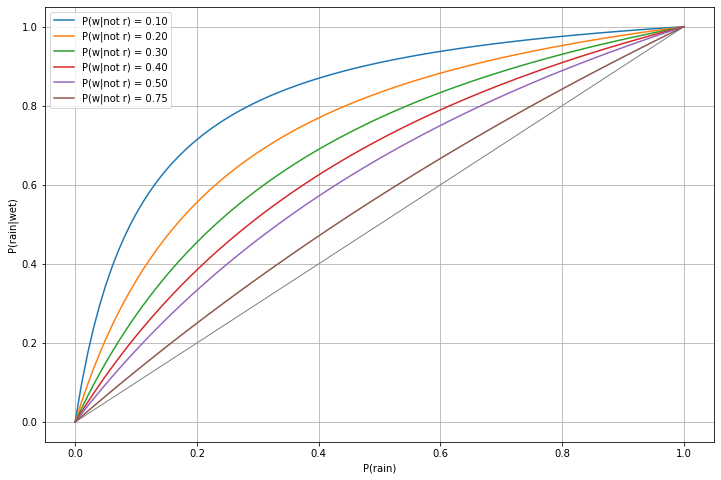

In [21]:
ps = np.linspace(0,1,100)
plt.xlabel("P(rain)")
plt.ylabel("P(rain|wet)");
plt.plot(ps, ps, c='grey', linewidth = 1);
for pw in [0.1, 0.2, 0.3, 0.4, 0.5, 0.75]:
    plt.plot(ps, ps/(ps+pw*(1-ps)),label = "P(w|not r) = {:.2f}".format(pw)); 
plt.grid()
plt.legend();

#### Problem: Base rate fallacy

You are tested for a rare disease (1 person in 250). Test has 80%  true positive rate and  10% false positive rate. i.e. test gives positive (you are ill) result for 80% of ill patients and for 10% of healthy patients.   

Your are tested positive, what are the chances you have the disease? 

#### Answer

What we need is the  probability that we are ill on condition that we have been tested positive:

$$P(ill|P)= \frac{P(ill, P)}{P(P)}$$

The probability of being ill and tested positive is 

In [22]:
p_ill_p = 0.004 * 0.8  

The probability of being tested positive is

$$P(P)=P(ill,P)+P(\neg ill, P)$$

In [23]:
p_p = .004*0.8 + 0.996*0.1

and finally 

In [24]:
p_ill_cond_p = p_ill_p/p_p
print("{:4.1f}%".format(100*p_ill_cond_p))

 3.1%


So there is no cause to despair yet :) 

### Increase of information (learning)

One could say that this test is useless if positive  result gives only $3\%$ chance of being ill. And  this particular test was actually discarde but it is not totaly useless. Before taking the test our chance of being ill was $0.4\%$. After seing the positive result it "jumped" more then ten times to $3.1\%$. 

$$0.004 \longrightarrow 0.031$$

After seing a negative result our chances of being ill dropped four times:

$$0.004 \longrightarrow 0.001 $$ 

## Independent events

It may happen that  knowledge that $B$ happened does not change  the probability of $A$

$$P(A|B) = P(A)$$

We say then that  events $A$ and $B$ are _independent_. 

For example when tossing the coin the outcome of toss does not depend in any way on the outcome of previous tosses or in case of dice the  face they land on are independent etc. 

Substituting the definition of conditional independence 

$$\frac{P(A\cap B)}{P(B)}  = P(A)$$

we obtain  a more familiar factorisation criterion for joint probability of independent events

$$P(A\cap B) = P(A)\cdot P(B)$$